# Classification Analysis Project

* Student name: Linh Mai
* Student pace: self paced
* Scheduled project review date/time: July 13th, 2020  
* Instructor name: Jeff Herman
* Blog post URL: https://linhmai19.github.io/ 


# Column Description

Below is the description for each of the columns in the dataset

* state: the state the user lives in
* account length: the number of days the user has this account
* area code: the code of the area the user lives in
* phone number: the phone number of the user
* international plan: true if the user has the international plan, otherwise false
* voice mail plan: true if the user has the voice mail plan, otherwise false
* number vmail messages: the number of voice mail messages the user has sent
* total day minutes: total number of minutes the user has been in calls during the day
* total day calls: total number of calls the user has done during the day
* total day charge: total amount of money the user was charged by the Telecom company for calls during the day
* total eve minutes: total number of minutes the user has been in calls during the evening
* total eve calls: total number of calls the user has done during the evening
* total eve charge: total amount of money the user was charged by the Telecom company for calls during the evening
* total night minutes: total number of minutes the user has been in calls during the night
* total night calls: total number of calls the user has done during the night
* total night charge: total amount of money the user was charged by the Telecom company for calls during the night
* total intl minutes: total number of minutes the user has been in international calls
* total intl calls: total number of international calls the user has done
* total intl charge: total amount of money the user was charged by the Telecom company for international calls
* customer service calls: number of customer service calls the user has done
* churn: true if the user terminated the contract, otherwise false

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
from numpy import float64
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import data file and review the dataset

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Review the general information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Check for missing values

In [4]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### There is no missing value in any column

## Deal with duplicate values 

In [5]:
# Convert the data type of 'area code' column to be the same with data type of 'phone number'
df['area code'] = df['area code'].astype(str)
df['phone number'] = df['phone number'].astype(str)

In [6]:
# Check the data type of 'area code' again
print(df['area code'].dtype)
print(df['phone number'].dtype)

object
object


In [7]:
# Combine 'area code' and 'phone number' columns to get full phone number
# Create a new column, called 'full pn'
df['full pn'] = df['area code']+df['phone number']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,full pn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,415382-4657
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,415371-7191
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,415358-1921
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,408375-9999
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,415330-6626


In [8]:
# Remove the '-' sign and change the data type for 'full pn' column
df['full pn'] = df['full pn'].str.replace('-','').astype(int64)

The 'full pn' column is the column that supposed to have unique values as it is the unique number to identify each customer. Therefore, any existing duplicates in 'full pn' column are eliminated from the dataset.

In [9]:
len(df[df['full pn'].duplicated()])

0

##### There is no duplicate values, 'area code', 'phone number', and 'full pn' can be dropped now as they are not helpful in building models later

In [10]:
df = df.drop(columns=['area code', 'phone number', 'full pn'], axis=1).copy()
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Calculate the total charge 

Create a new column 'total charge' for total payment that the customer has to pay

In [11]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['total charge'] = df['total charge'].astype(float64)

## Check for outliers

In [12]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,59.449754
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,10.502261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,22.930000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,52.380000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,59.470000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,66.480000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,96.150000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [14]:
# Omit 'object' type columns and save in another dataframe
df2 = df.drop(columns=['state', 'international plan', 'voice mail plan', 'churn'])

In [15]:
# Divide that 2nd dataframe into 2 different dataframes for clear visualization 
df3 = df2[['account length', 'total day minutes', 'total eve minutes', 'total night minutes']]
df4 = df2.drop(columns=['account length', 'total day minutes', 'total eve minutes', 
                        'total night minutes'], axis=1)

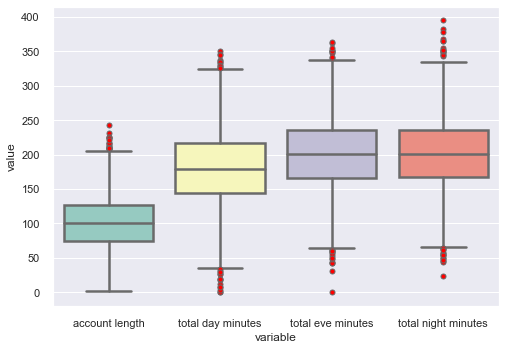

In [26]:
# Plot df3 
sns.set(style="darkgrid")
flierprops = dict(marker='o', markersize=5, markerfacecolor='red')
sns.boxplot(x="variable", y="value", data=pd.melt(df3), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.show()

There are some outstanding outeliers in 'account length', 'total day minutes', 'total eve minutes', 'total night minutes' columns. These outliers are removed by limit the ranges in each of these 4 columns

In [27]:
# Limit the ranges in columns to remove outliers
df = df.loc[(df['account length'] < 225)].copy()
df = df.loc[(df['total day minutes'] > 25) & (df['total day minutes'] < 340)].copy()
df = df.loc[(df['total eve minutes'] > 40) & (df['total eve minutes'] < 352)].copy()
df = df.loc[(df['total night minutes'] > 40) & (df['total night minutes'] < 352)].copy()

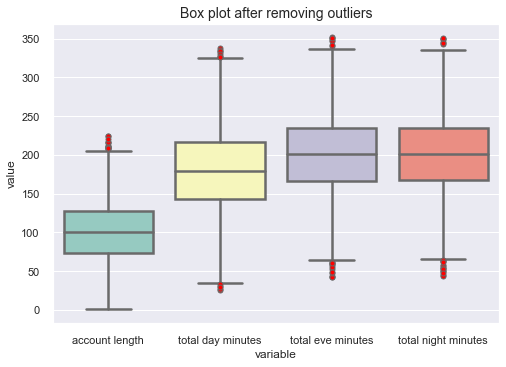

In [28]:
# Plot the boxplot again to see the results
df2 = df.drop(columns=['state', 'international plan', 'voice mail plan', 'churn'])
df3 = df2[['account length', 'total day minutes', 'total eve minutes', 'total night minutes']]
sns.boxplot(x="variable", y="value", data=pd.melt(df3), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.title('Box plot after removing outliers', fontsize=14)
plt.show()

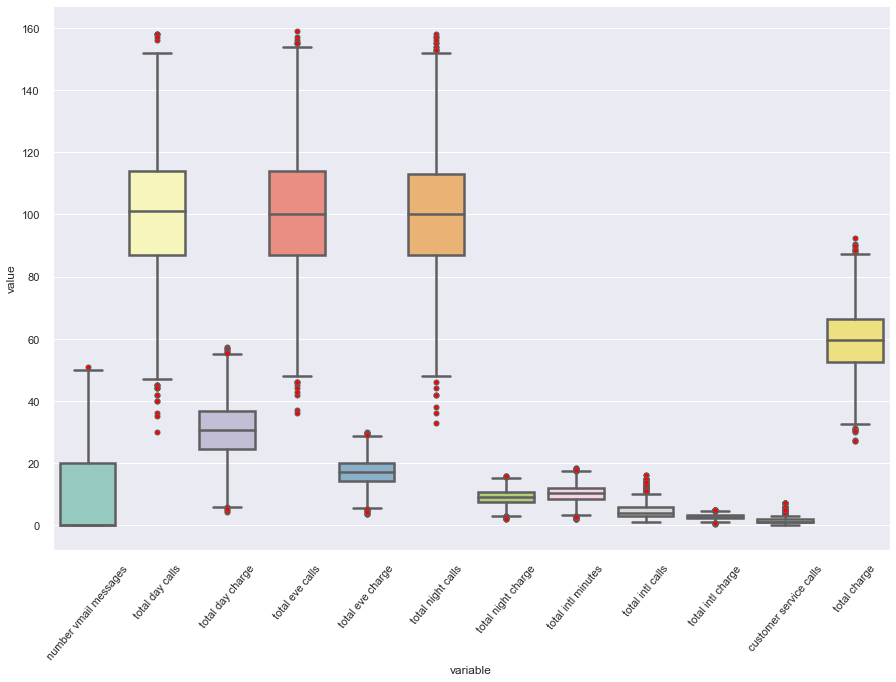

In [34]:
# Plot the df4
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df4), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.xticks(range(len(df4.columns.values)), df4.columns.values, rotation=50)
plt.show()

In [31]:
# Limit the ranges in columns to remove outliers
df = df.loc[(df['total day calls'] > 25) & (df['total day calls'] < 160)].copy()
df = df.loc[(df['total eve calls'] > 25) & (df['total eve calls'] < 160)].copy()
df = df.loc[(df['total eve charge'] >1)].copy()
df = df.loc[(df['total night calls'] < 160)].copy()
df = df.loc[(df['total intl minutes'] > 1) & (df['total intl minutes'] < 19)].copy()
df = df.loc[(df['total intl calls'] < 17)].copy()
df = df.loc[(df['total intl charge'] > 0.5) & (df['total intl charge'] <= 5)].copy()
df = df.loc[(df['customer service calls'] < 8)].copy()
df = df.loc[(df['total charge'] >= 25) & (df['total charge'] < 95)].copy()

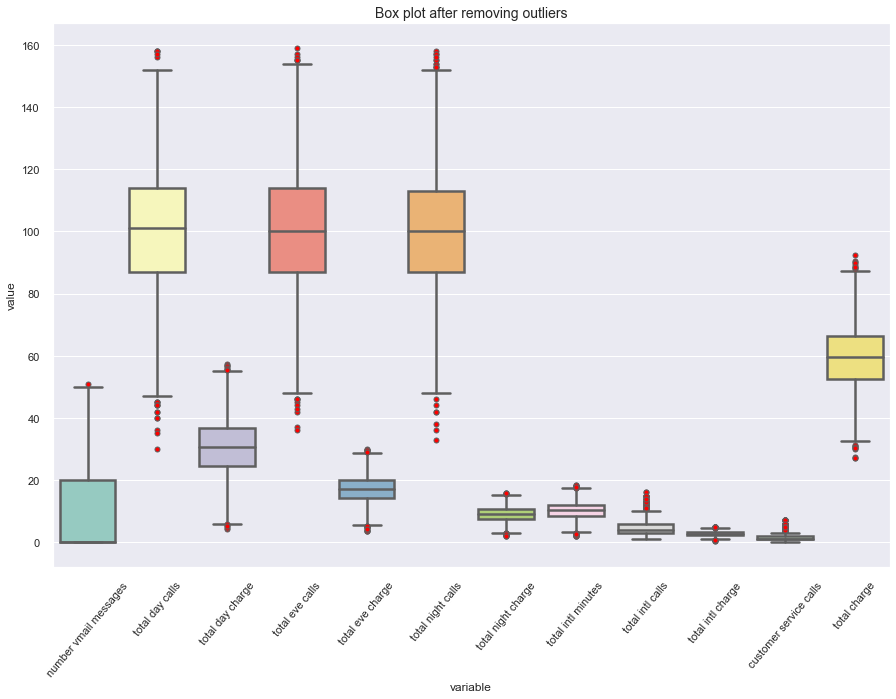

In [35]:
# Plot the boxplot again to see the results
df2 = df.drop(columns=['state', 'international plan', 'voice mail plan', 'churn'])
df4 = df2.drop(columns=['account length', 'total day minutes', 'total eve minutes', 'total night minutes'], axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df4), linewidth=2.5, 
            palette="Set3", flierprops=flierprops)
plt.title('Box plot after removing outliers', fontsize=14)
plt.xticks(range(len(df4.columns.values)), df4.columns.values, rotation=50)
plt.show()

In [36]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge
count,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000
mean,100.853067,8.121779,180.220123,100.392331,30.637954,200.959877,100.118405,17.081804,200.435031,100.032515,9.019666,10.293221,4.483436,2.779684,1.553988,59.519107
std,39.666014,13.710556,53.626731,19.827325,9.116514,50.259370,19.702359,4.272042,49.877959,19.486430,2.244560,2.678652,2.375989,0.723203,1.295956,10.329254
min,1.000000,0.000000,25.900000,30.000000,4.400000,42.200000,36.000000,3.590000,43.700000,33.000000,1.970000,2.000000,1.000000,0.540000,0.000000,27.020000
25%,74.000000,0.000000,143.975000,87.000000,24.475000,166.675000,87.000000,14.167500,166.800000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,52.465000
50%,100.000000,0.000000,179.600000,101.000000,30.535000,201.400000,100.000000,17.120000,200.750000,100.000000,9.035000,10.300000,4.000000,2.780000,1.000000,59.475000
75%,127.000000,20.000000,216.700000,114.000000,36.840000,235.100000,114.000000,19.980000,235.000000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000,66.482500
max,224.000000,51.000000,337.400000,158.000000,57.360000,351.600000,159.000000,29.890000,350.200000,158.000000,15.760000,18.400000,16.000000,4.970000,7.000000,92.290000


# Save cleaned dataset into a new csv file

Save the cleaned data into 'cleaned_customer_churn.csv' for later analysis

In [37]:
df.to_csv('cleaned_customer_churn.csv')